In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Spotify and chart data analysis

This notebook contains a description of the information used for the purposes of the project.


## Used Data

Only one dataset is used - `complete_song_data.csv`. The dataset is composed of two separate datasets - one containing songs with their spotify features and one with information about songs's chart performance. The two datasets are merged.
* Chart information is taken from a json file, located at https://github.com/mhollingshead/billboard-hot-100
* The spotify features dataset is found at https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features?select=Hot+100+Audio+Features.csv, but is later also expanded, through the usage of Spotify API, filling many missing values (the original dataset only has songs released up to to around 2020, I expanded it to 2024).

The merged dataset is saved as `filled_spotify.csv`. Using the Spotify API, I was able to acquire most of the songs' main artist spotify popularity and followers. These are additional popularity metrics, which could be insightful in predicting hot 100 positions (popular artists )

In [4]:
data = pd.read_csv("data/filled_artists_info.csv", index_col=0)

In [5]:
data

,song,artist,peak_position,weeks_on_chart,year,date,spotify_genre,track_duration_s,explicit_track,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,main_artist,artist_list,artist_popularity,artist_followers
0,A Bar Song (Tipsy),Shaboozey,1,17,2024,2024-08-17,"['modern country pop', 'pop rap']",171.291,True,0.722,...,0.06330,0.000000,0.0804,0.604,81.012,91.0,Shaboozey,['Shaboozey'],80.0,803992.0
1,I Had Some Help,Post Malone Featuring Morgan Wallen,1,13,2024,2024-08-17,"['dfw rap', 'melodic rap', 'pop', 'rap']",178.205,True,0.638,...,0.00757,0.000000,0.2450,0.731,127.986,93.0,Post Malone,"['Post Malone', 'Morgan Wallen']",91.0,45836927.0
2,Not Like Us,Kendrick Lamar,1,14,2024,2024-08-17,"['conscious hip hop', 'hip hop', 'rap', 'west ...",274.192,True,0.898,...,0.01070,0.000000,0.1410,0.214,101.061,95.0,Kendrick Lamar,['Kendrick Lamar'],91.0,34248142.0
3,Espresso,Sabrina Carpenter,3,17,2024,2024-08-17,['pop'],175.459,True,0.701,...,0.10700,0.000065,0.1850,0.690,103.969,98.0,Sabrina Carpenter,['Sabrina Carpenter'],94.0,15183266.0
4,Million Dollar Baby,Tommy Richman,2,15,2024,2024-08-17,['chill abstract hip hop'],155.151,False,0.852,...,0.09730,0.000370,0.0678,0.919,138.029,94.0,Tommy Richman,['Tommy Richman'],78.0,763043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31442,Stay,The Ames Brothers,90,1,1958,1958-08-04,"['adult standards', 'deep adult standards', 'e...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,The Ames Brothers,['The Ames Brothers'],31.0,19948.0
31443,Over And Over,Thurston Harris,96,1,1958,1958-08-04,['rock-and-roll'],138.293,False,0.580,...,0.76100,0.000905,0.1150,0.817,83.588,21.0,Thurston Harris,['Thurston Harris'],49.0,19064.0
31444,Little Serenade,The Ames Brothers,98,1,1958,1958-08-04,"['adult standards', 'deep adult standards', 'e...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,The Ames Brothers,['The Ames Brothers'],31.0,19948.0
31445,I'll Get By (As Long As I Have You),Billy Williams,99,1,1958,1958-08-04,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Billy Williams,['Billy Williams'],39.0,2171.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31447 entries, 0 to 31446
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song                31447 non-null  object 
 1   artist              31447 non-null  object 
 2   peak_position       31447 non-null  int64  
 3   weeks_on_chart      31447 non-null  int64  
 4   year                31447 non-null  int64  
 5   date                31447 non-null  object 
 6   spotify_genre       30698 non-null  object 
 7   track_duration_s    28628 non-null  float64
 8   explicit_track      28628 non-null  object 
 9   danceability        28627 non-null  float64
 10  energy              28627 non-null  float64
 11  key                 28627 non-null  float64
 12  loudness            28627 non-null  float64
 13  mode                28627 non-null  float64
 14  speechiness         28627 non-null  float64
 15  acousticness        28627 non-null  float64
 16  instrumen

In [7]:
data.describe()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
count,31447.000000,31447.000000,31447.000000,28628.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28627.000000,28628.000000,31442.000000,3.144200e+04
mean,46.825007,10.965593,1988.734601,218.251710,0.604434,0.616668,5.219513,-8.574060,0.719670,0.078965,0.295356,0.033810,0.193045,0.594173,120.473243,41.735888,56.940971,7.299304e+06
std,30.441584,8.550791,20.732369,67.612954,0.154276,0.196705,3.568312,3.582634,0.449168,0.089067,0.283437,0.140181,0.158931,0.241134,28.216683,23.072855,23.163184,1.932770e+07
min,1.000000,1.000000,1958.000000,27.133000,0.000000,0.000581,0.000000,-37.326000,0.000000,0.000000,0.000002,0.000000,0.009670,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,19.000000,4.000000,1970.000000,172.733000,0.503000,0.478000,2.000000,-10.893000,0.000000,0.032600,0.046200,0.000000,0.092600,0.402000,99.021500,22.000000,42.000000,6.991200e+04
50%,47.000000,9.000000,1986.000000,212.000000,0.612000,0.632000,5.000000,-8.072000,1.000000,0.042700,0.193000,0.000004,0.131000,0.611000,119.305000,44.000000,60.000000,7.980415e+05
75%,73.000000,16.000000,2008.000000,250.710000,0.714000,0.771000,8.000000,-5.811000,1.000000,0.074450,0.513000,0.000407,0.249000,0.798000,137.299500,60.000000,74.000000,4.694306e+06
max,100.000000,91.000000,2024.000000,3079.157000,0.988000,0.997000,11.000000,2.291000,1.000000,0.951000,0.996000,0.982000,0.999000,0.991000,241.009000,100.000000,100.000000,1.263410e+08


The dataset contains information about the following features:

* `song` - the name of the song
* `artist` - the name of the song's artists
* `peak_position` - the highest position the song has reached on the chart. It is an integer value with 1 being the highest and 100 the lowest
* `weeks_on_chart` - the number of weeks a song has been on the chart
* `year` - the year when the song first entered the chart. Contains years from 1958 to 2024 - the whole lifespan of the Billboard Hot 100 chart
* `date` - the date of the position obesrvation
* `spotify_genre` - a list of genres, that spotify has assigned to the song's artists
* `track_duration_s` - the song duration in seconds
* `explicit_track` - a boolean value, representing if the song is explicit or not
* `danceability` - a value between 0 and 1, that bases how danceable a song is
* `energy` - how energetic is the song, between 0 and 1
* `key` - the key in which the song is. Integer value in the range of -1 to 11. -1 if the key was not found
* `loudness` - how loud the track is in decibels (dB). values between -60 and 0, where 0 is the highest
* `mode` - 0 or 1. 1 indicates major and 0 indicates minor.
* `speechiness` - the presence of spoken words in a track. Between 0 and 1
* `acousticness` - a value between 0 and 1, representing how confident Spotify is, that the song is acoustic
* `instrumentalness` - a value between 0 and 1, representing how confident Spotify is, that the song has no vocal content.
* `liveness` - a value between 0 and 1, that indicates how present an audience is in the recording
* `valence` - a value between 0 and 1, indicating how positive the track is
* `tempo` - the song's tempo
* `spotify_popularity` - the popularity of the song on the Spotify streaming service
* `main_artist` - the name of the main artist that performs the song
* `artist_list` - a list of all artists that are featured on the song, including the main one

Additionaly, I was able to create 2 additional features, using information, provided by the SpotifyAPI:

* `artist_popularity` - calculated through the popularity of all the artist's tracks.
* `spotify_followers` - the total number of followers on spotify

## Correlations

First, lets take a look at how the different features correlate with each other. The `peak_position` column will be inversed, to accurately represent lower positions as higher values on the heatmap.

I will also drop observations that have less than 10000 followers and are for an year after 2000, as they are most likely API errors. Its very unlikely for an artist that enters the Billboard Hot 100 to have so little followers, especially if the artist is from the new streaming era (after the year 2000 for example).

In [10]:
numeric = data.select_dtypes(include="number")
numeric["peak_position"] = 101 - numeric["peak_position"]
numeric = numeric[~((numeric["artist_followers"] < 10000) & (numeric["year"] >= 2000))]

In [11]:
numeric = numeric.dropna().reset_index(drop=True)
len(numeric)

28365

In [12]:
numeric.corr()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
peak_position,1.000000,0.685784,-0.058794,0.063569,0.036744,-0.010116,-0.006040,-0.022343,0.007964,-0.065691,-0.018652,-0.035278,-0.022800,0.039560,-0.011588,0.305919,0.110493,0.073724
weeks_on_chart,0.685784,1.000000,0.115178,0.161501,0.100271,0.087771,0.010794,0.099393,-0.018208,-0.071679,-0.150357,-0.045125,-0.059479,0.011485,-0.013441,0.362607,0.080431,-0.039054
year,-0.058794,0.115178,1.000000,0.196538,0.279316,0.262127,0.007939,0.505317,-0.164538,0.347842,-0.446660,-0.150171,-0.074081,-0.332594,0.052925,0.689709,0.596770,0.422451
track_duration_s,0.063569,0.161501,0.196538,1.000000,0.061607,0.119431,0.009136,0.020843,-0.105723,0.010612,-0.272505,0.014017,-0.030388,-0.135788,-0.024972,0.154213,0.089100,0.041410
danceability,0.036744,0.100271,0.279316,0.061607,1.000000,0.202376,0.019086,0.157972,-0.163210,0.265155,-0.322980,-0.019317,-0.129967,0.354465,-0.129036,0.192128,0.115946,0.076647
energy,-0.010116,0.087771,0.262127,0.119431,0.202376,1.000000,0.022967,0.679591,-0.096829,0.124110,-0.579415,-0.014461,0.116125,0.351257,0.149718,0.162999,0.101205,0.015621
key,-0.006040,0.010794,0.007939,0.009136,0.019086,0.022967,1.000000,0.007676,-0.146838,0.020305,-0.019959,0.001832,-0.001066,0.020372,-0.010448,-0.000348,-0.008957,-0.013122
loudness,-0.022343,0.099393,0.505317,0.020843,0.157972,0.679591,0.007676,1.000000,-0.086264,0.177132,-0.417044,-0.151450,0.044358,0.009940,0.090525,0.365241,0.301598,0.174436
mode,0.007964,-0.018208,-0.164538,-0.105723,-0.163210,-0.096829,-0.146838,-0.086264,1.000000,-0.144558,0.137275,-0.006137,0.011926,-0.004370,0.015462,-0.125041,-0.100847,-0.066552
speechiness,-0.065691,-0.071679,0.347842,0.010612,0.265155,0.124110,0.020305,0.177132,-0.144558,1.000000,-0.168334,-0.068351,0.072590,-0.054675,0.068123,0.216114,0.217636,0.162782


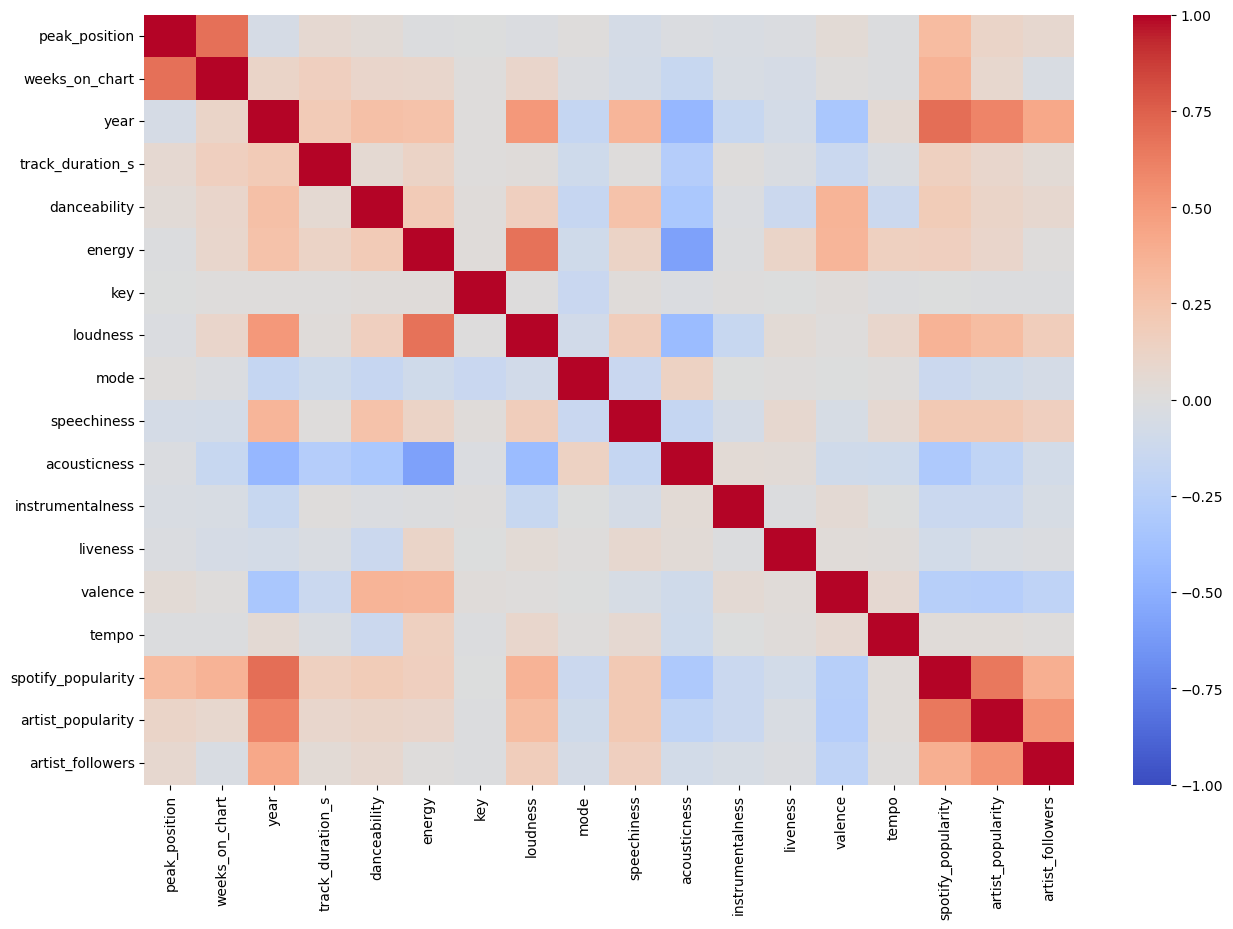

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Some key takeaways:

* The peak position is strongly related with the weeks on chart, but surprisingly, not that strongly with the spotify song and artist popularity. Also there is pretty much no correlation between the position and the audio features of the song.
* Weeks on chart does have a minor correlation with the track duration, danceability and loudness, meaning that more energetic songs tend to stay on the chart for a *little* longer. Weeks on chart also have weak correlations with the spotify and artist popularity metrics.
* Year has correlations with most of the features, most noticeably with the features provided by the Spotify API. This is because Spotify is an app launched in 2006 and is becoming extremely popular in the most recent years. This means that newer songs and artists will tend to get more popular than the old ones, as the new generation, listening to the new songs, will often do so through Spotify.
* Acousticness, valence instrumentalness and mode decrease with the passing years, while danceability, energy, track duration and especially speechiness and loudness increase.
* The Spotify metrics are strongly correlated with each other.

Peak position has weak correlation with the artist popularity metrics likely because artists from the older generation tend to be less popular on Spotify, as the platform is used more by younger people. If the data is filtered to only include songs after 2006 (when spotify was released), the correlations will look different:

In [15]:
after_2006 = numeric[numeric["year"] > 2006]
popularity = after_2006[["peak_position", "weeks_on_chart", "spotify_popularity", "artist_popularity", "artist_followers"]].corr()

<Axes: >

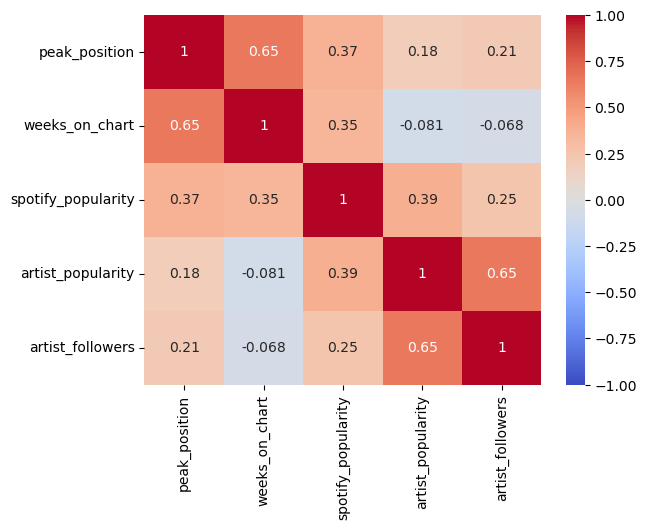

In [16]:
sns.heatmap(popularity, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

As expected, the followers and popularity on Spotify does have a higher effect on the peak position, although the correlation is still not that high. This leads me to the conclusion that the effect of spotify metrics on the chart position gets higher with the passing years.

## Feature distributions

Now lets visually display how the different features - spotify, audio and chart changed over the years. But first, normalize the data, so that it can be visualized better. Some of the Spotify audio features are already in range between 0 and 1, so I won't have to include them in the `MinMaxScaler` preprocessing tool, that I am going to use. The key column will be dropped, as it contains categorical data.

The mode is also a categorical value but only has two classes, which means it can be left in while 

In [19]:
numeric = numeric.drop(columns=["key"])

mm_scaler = MinMaxScaler()
not_scaled_columns = [
    "peak_position", "weeks_on_chart", "track_duration_s",
    "year", "loudness", "tempo", "artist_popularity",
    "artist_followers", "spotify_popularity"
]
to_scale = numeric[not_scaled_columns].copy()

mm_scaler.fit(to_scale)
scaled_numeric = numeric.copy()
scaled_numeric[not_scaled_columns] = mm_scaler.transform(to_scale)
scaled_numeric["year"] = numeric["year"]

In [20]:
scaled_numeric.describe()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
count,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000
mean,0.551780,0.114404,1989.580610,0.062612,0.603869,0.615912,0.725051,0.720465,0.078556,0.296244,0.034019,0.193170,0.594480,0.499884,0.417331,0.591105,0.062479
std,0.305817,0.096383,20.766264,0.022213,0.154076,0.196849,0.090390,0.448778,0.088630,0.283727,0.140583,0.158998,0.241215,0.117049,0.230737,0.218045,0.159049
min,0.000000,0.000000,1958.000000,0.000000,0.000000,0.000581,0.000000,0.000000,0.000000,0.000002,0.000000,0.009670,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292929,0.033333,1970.000000,0.047608,0.503000,0.477000,0.666557,0.000000,0.032500,0.046500,0.000000,0.092600,0.402000,0.410893,0.220000,0.450000,0.000858
50%,0.565657,0.100000,1987.000000,0.060572,0.611000,0.631000,0.737461,1.000000,0.042500,0.194000,0.000004,0.132000,0.611000,0.495027,0.440000,0.620000,0.007821
75%,0.838384,0.177778,2009.000000,0.073272,0.713000,0.771000,0.794836,1.000000,0.073900,0.515000,0.000417,0.249000,0.798000,0.569597,0.600000,0.750000,0.042667
max,1.000000,1.000000,2024.000000,1.000000,0.988000,0.997000,1.000000,1.000000,0.951000,0.996000,0.982000,0.999000,0.991000,1.000000,1.000000,1.000000,1.000000


Now I will need to get the mean value of each feature for each year and plot the lines. I will create 2 plots to show half of the features in each one.

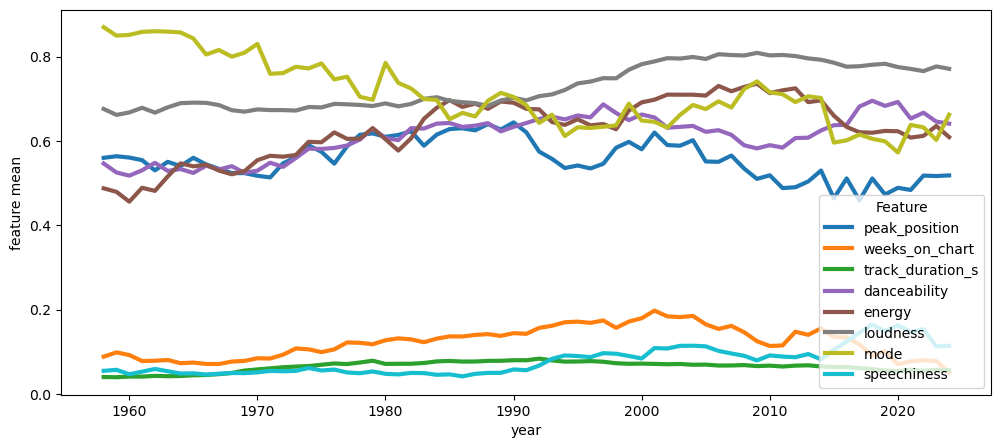

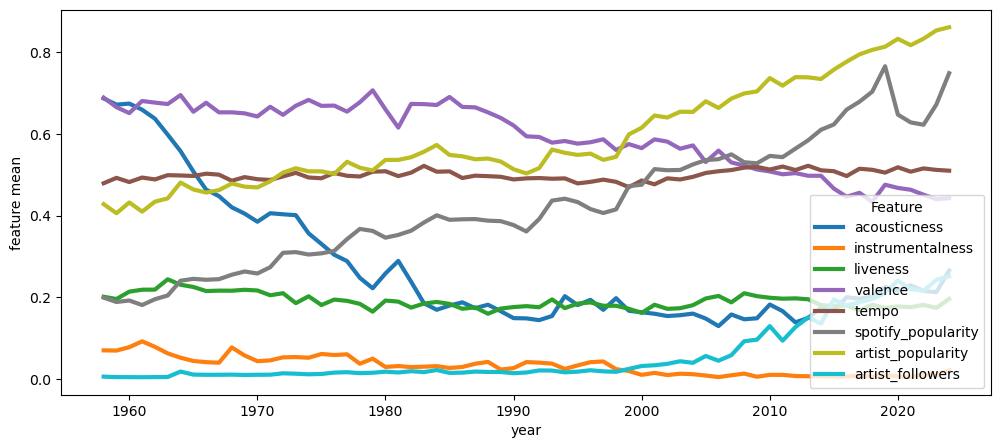

In [22]:
scaled_numeric["year"] = numeric["year"]
feature_evolutions = scaled_numeric.groupby("year").mean()

col_range = len(feature_evolutions.columns) // 2
feature_evolutions.iloc[:, :col_range].plot(kind="line", figsize=(12,5), lw=3, cmap='tab10')
plt.legend(title="Feature", loc="lower right")
plt.ylabel("feature mean")
plt.show()

feature_evolutions.iloc[:, col_range:].plot(kind="line", figsize=(12,5), lw=3, cmap='tab10')
plt.legend(title="Feature", loc="lower right")
plt.ylabel("feature mean")
plt.show()

### Some useful observations for later modelling:

* The spotify popularity in most recent years is more than three times higher than for songs released aroung 1960.
* Artist followers start increasing a lot around 2000
* Scaled artist popularity starts at around 0.4 and moves all the way up to 0.9. Again a more than two times increase.
* Average weeks spent on the chart seem to have become lower than ten years ago, possibly because of the fast-evolving music trends in recent years, leading to songs passing through the chart more quickly.
* Average weeks on chart in 2024 have a big downfall, because the year is not over yet, so the songs have not had enough time to stay on the chart.

## Feature Distributions

Lets explore how the features are distributed by using boxplots and histograms.

In [24]:
numeric

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
0,100,17,2024,171.291,0.722,0.709,-4.950,1.0,0.0273,0.06330,0.000000,0.0804,0.604,81.012,91.0,80.0,803992.0
1,100,13,2024,178.205,0.638,0.855,-4.860,1.0,0.0264,0.00757,0.000000,0.2450,0.731,127.986,93.0,91.0,45836927.0
2,100,14,2024,274.192,0.898,0.472,-7.001,1.0,0.0776,0.01070,0.000000,0.1410,0.214,101.061,95.0,91.0,34248142.0
3,98,17,2024,175.459,0.701,0.760,-5.478,1.0,0.0285,0.10700,0.000065,0.1850,0.690,103.969,98.0,94.0,15183266.0
4,99,15,2024,155.151,0.852,0.697,-5.520,0.0,0.0439,0.09730,0.000370,0.0678,0.919,138.029,94.0,78.0,763043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28360,21,1,1958,161.560,0.534,0.803,-9.129,1.0,0.0743,0.74100,0.000061,0.3070,0.969,167.983,75.0,70.0,2071622.0
28361,20,1,1958,128.000,0.804,0.672,-12.503,1.0,0.0488,0.77700,0.000020,0.0747,0.947,109.508,19.0,70.0,2071622.0
28362,15,1,1958,154.173,0.242,0.436,-7.528,1.0,0.0367,0.65800,0.000000,0.3240,0.345,69.182,44.0,56.0,460524.0
28363,5,1,1958,138.293,0.580,0.486,-10.251,0.0,0.0347,0.76100,0.000905,0.1150,0.817,83.588,21.0,49.0,19064.0


In [25]:
cols = len(numeric.drop(columns="mode").columns)
cols

16

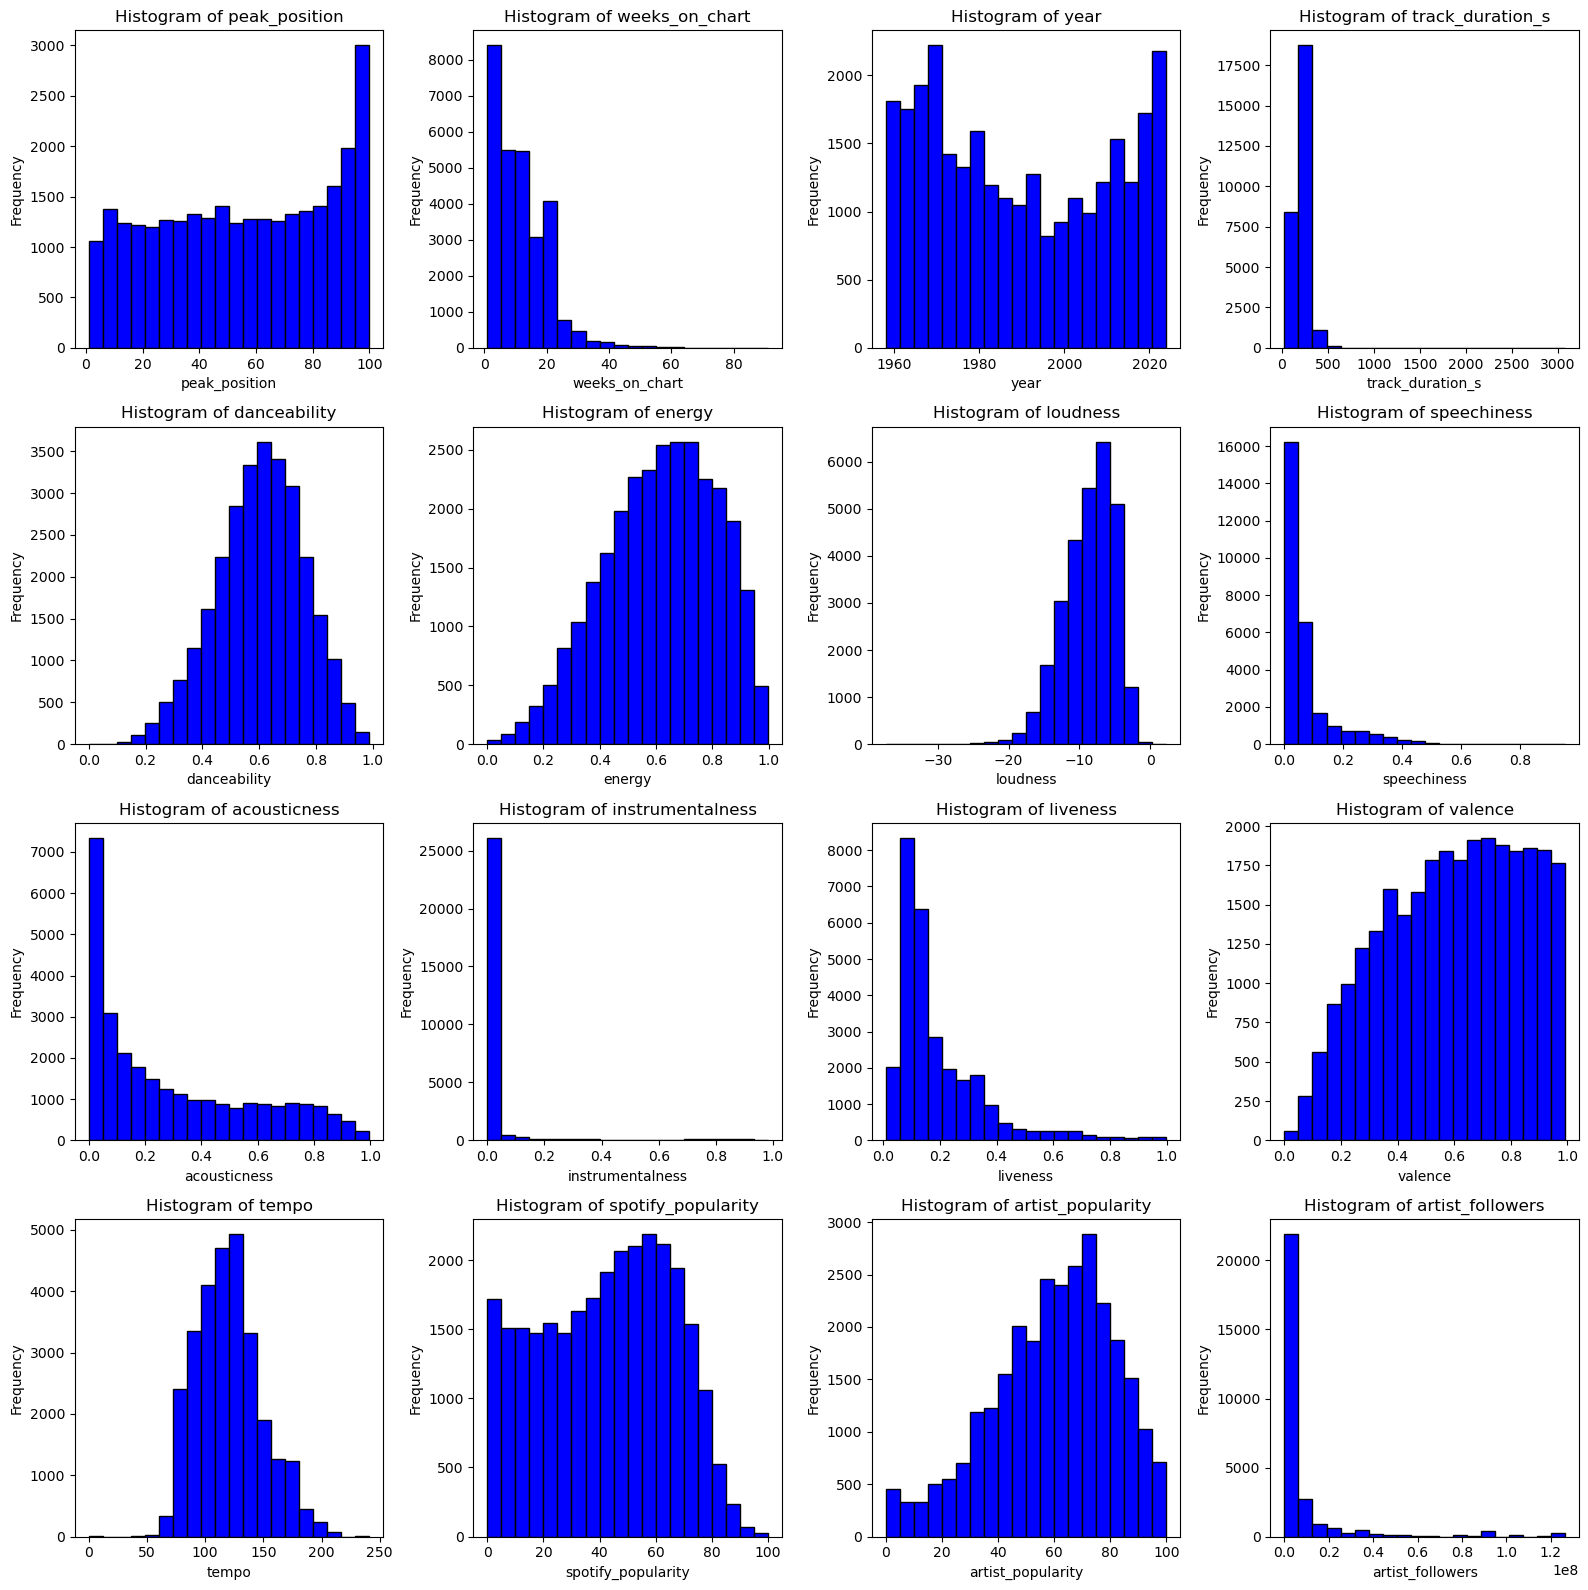

In [26]:
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
axes = axes.flatten()

# Plot a histogram for each column
for i, column in enumerate(numeric.drop(columns="mode").columns):
    axes[i].hist(numeric[column], bins=20, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can see that most columns either have a normal distribution or a very right skewed distribution. Now lets check the boxplot of the previously scaled features to be able to visualize them together.

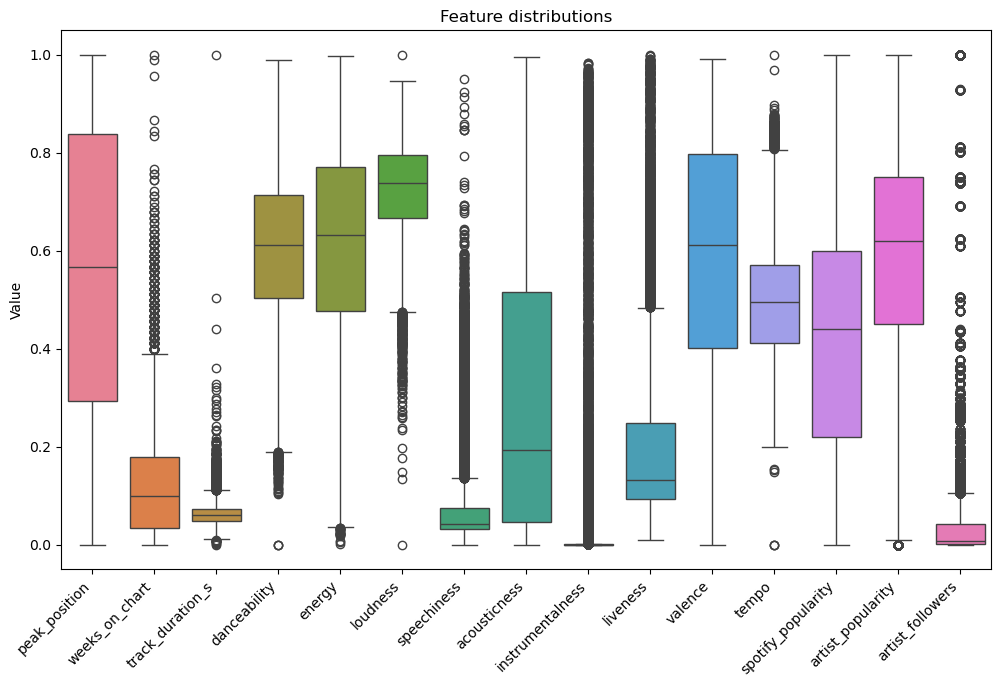

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(scaled_numeric.drop(columns=["year", "mode"]))
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value")
plt.title("Feature distributions")

plt.show()

The features are very unevenly distributed. 

Most columns have outliers, which get very obvious because of the scaling done through the `MinMaxScaler`. We can see that the weeks spent on the chart for most songs are in a box, that is very narrow in size because of the far outliers. Same thing goes for speechiness, liveness, loudness, track duration and artist followers, which have quite a lot of outliers.

This indicates that the `MinMaxScaler` alone is likely not the enough to treat the data. Lets try scaling the features differently and plot boxes again. Looking at the columns, I can indicate which of them contain a lot of outliers. I will perform log scaling on the right skewed data and square root scaling on the features with ranges already between 0 and 1. The transfomrations will be done on the pre-scaled data then scale it again and see if the boxplot looks different.

In [30]:
outlier_log_columns = [
    "weeks_on_chart", "track_duration_s", "artist_followers", 
]

outlier_sqrt_columns = [
    "loudness", "liveness", "tempo", "instrumentalness"
]

In [31]:
numeric["loudness"] = scaled_numeric["loudness"] # Keep the scaled values for loudness to avoid using log transformation on negative values
numeric[outlier_log_columns] = np.log1p(numeric[outlier_log_columns])
numeric[outlier_sqrt_columns] = np.sqrt(numeric[outlier_sqrt_columns])

In [32]:
numeric.describe()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
count,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000
mean,55.626194,2.229122,1989.580610,5.350059,0.603869,0.615912,0.849719,0.720465,0.078556,0.296244,0.061438,0.411399,0.594480,10.901448,41.733051,59.110453,13.281511
std,30.275849,0.807975,20.766264,0.279401,0.154076,0.196849,0.055035,0.448778,0.088630,0.283727,0.173911,0.154668,0.241215,1.278730,23.073708,21.804482,3.099240
min,1.000000,0.693147,1958.000000,3.336943,0.000000,0.000581,0.000000,0.000000,0.000000,0.000002,0.000000,0.098336,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.609438,1970.000000,5.155797,0.503000,0.477000,0.816430,0.000000,0.032500,0.046500,0.000000,0.304302,0.402000,9.951332,22.000000,45.000000,11.593270
50%,57.000000,2.397895,1987.000000,5.361292,0.611000,0.631000,0.858756,1.000000,0.042500,0.194000,0.002000,0.363318,0.611000,10.922729,44.000000,62.000000,13.803522
75%,84.000000,2.890372,2009.000000,5.528476,0.713000,0.771000,0.891536,1.000000,0.073900,0.515000,0.020421,0.498999,0.798000,11.716569,60.000000,75.000000,15.500173
max,100.000000,4.521789,2024.000000,8.032736,0.988000,0.997000,1.000000,1.000000,0.951000,0.996000,0.990959,0.999500,0.991000,15.524465,100.000000,100.000000,18.654495


In [33]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(numeric)
scaled_numeric = pd.DataFrame(mm_scaler.transform(numeric), columns=numeric.columns)

In [34]:
scaled_numeric.describe()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
count,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000
mean,0.551780,0.401180,0.478494,0.428706,0.611204,0.617542,0.849719,0.720465,0.082603,0.297432,0.061999,0.347398,0.599878,0.702211,0.417331,0.591105,0.711974
std,0.305817,0.211034,0.314640,0.059500,0.155947,0.197557,0.055035,0.448778,0.093197,0.284867,0.175498,0.171631,0.243406,0.082369,0.230737,0.218045,0.166139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292929,0.239325,0.181818,0.387337,0.509109,0.478131,0.816430,0.000000,0.034175,0.046684,0.000000,0.228556,0.405651,0.641010,0.220000,0.450000,0.621473
50%,0.565657,0.445262,0.439394,0.431098,0.618421,0.632685,0.858756,1.000000,0.044690,0.194777,0.002018,0.294044,0.616549,0.703582,0.440000,0.620000,0.739957
75%,0.838384,0.573891,0.772727,0.466701,0.721660,0.773188,0.891536,1.000000,0.077708,0.517067,0.020607,0.444606,0.805247,0.754716,0.600000,0.750000,0.830908
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


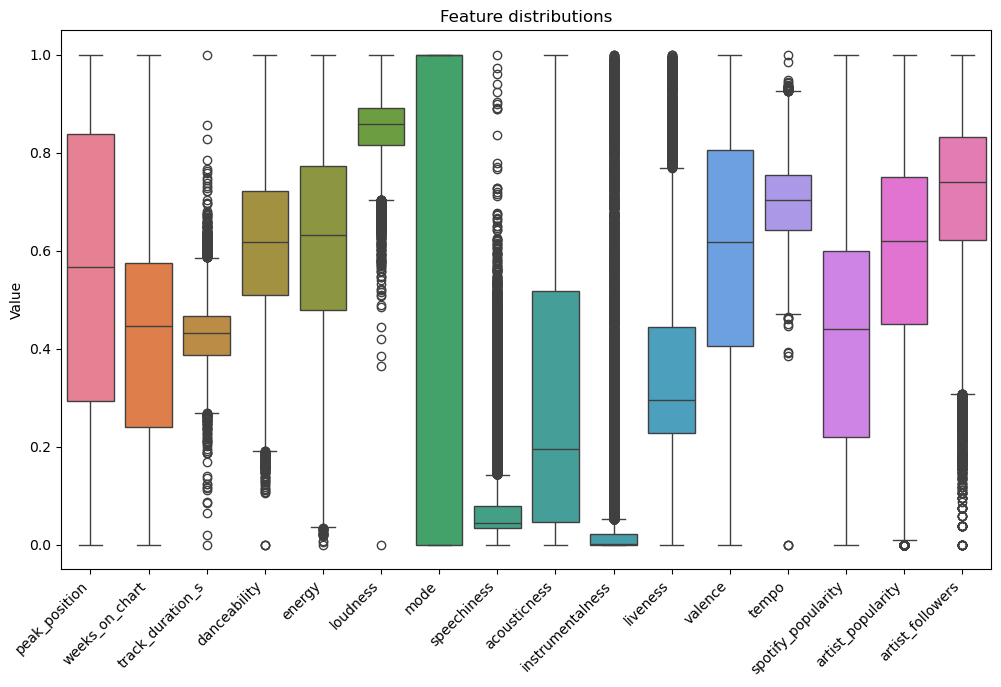

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(scaled_numeric.drop(columns="year"))
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value")
plt.title("Feature distributions")

plt.show()

In [36]:
scaled_numeric.describe()

,peak_position,weeks_on_chart,year,track_duration_s,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spotify_popularity,artist_popularity,artist_followers
count,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000,28365.000000
mean,0.551780,0.401180,0.478494,0.428706,0.611204,0.617542,0.849719,0.720465,0.082603,0.297432,0.061999,0.347398,0.599878,0.702211,0.417331,0.591105,0.711974
std,0.305817,0.211034,0.314640,0.059500,0.155947,0.197557,0.055035,0.448778,0.093197,0.284867,0.175498,0.171631,0.243406,0.082369,0.230737,0.218045,0.166139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292929,0.239325,0.181818,0.387337,0.509109,0.478131,0.816430,0.000000,0.034175,0.046684,0.000000,0.228556,0.405651,0.641010,0.220000,0.450000,0.621473
50%,0.565657,0.445262,0.439394,0.431098,0.618421,0.632685,0.858756,1.000000,0.044690,0.194777,0.002018,0.294044,0.616549,0.703582,0.440000,0.620000,0.739957
75%,0.838384,0.573891,0.772727,0.466701,0.721660,0.773188,0.891536,1.000000,0.077708,0.517067,0.020607,0.444606,0.805247,0.754716,0.600000,0.750000,0.830908
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some outliers have been treated, some not so much. The instrumentalness, speechiness, track duration and loudness columns especially still consist of a lot of outliers and very narrow quartile ranges. 
The transformation did have a very good effect on weeks on chart, removing all outliers. It had a decent result on track duration and artist followers, but still left a lot of outliers.

The features with outliers will have to be clipped to some upper and lower bounds before passing them to a model. The data will be further preprocessed before passing it to a model, to ensure the proper treatment of the outliers. 